In [ ]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib

In [46]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [47]:
results = pd.read_csv("data.csv", delimiter=";")
results

,LabTestResultID,TestResultDate,PatientID,TestValue,TestUnit,TestReferenceLimits,TestReferenceLowerLimit,TestReferenceUpperLimit,LabMethodID,LabMethodName
0,100043173@225259740,2021-04-25,2412103,Отрицательно,NaN,NaN,NaN,NaN,10000944,Глюкоза
1,100043174@225259741,2021-04-25,2412103,Отрицательно,NaN,NaN,NaN,NaN,10000945,Билирубин
2,100043175@225259742,2021-04-25,2412103,0.2,NaN,NaN,NaN,NaN,10000946,Уробилиноген
3,100043176@225259743,2021-04-25,2412103,<=5,NaN,NaN,NaN,NaN,10000947,Кетоны
4,100043177@225259744,2021-04-25,2412103,Отрицательно,NaN,NaN,NaN,NaN,9997208,Нитриты
...,...,...,...,...,...,...,...,...,...,...
3638600,129801963@-1,2021-10-14,6769367,58,%,47.00-72.00,47,72,10005146,(NEU%) Нейтрофилы
3638601,129801964@-1,2021-10-14,6769367,10.2,%,5.00-12.00,5,12,25256,(MONO%) Моноциты
3638602,129801965@-1,2021-10-14,6769367,30.4,%,19-37,19,37,25258,(LYM%) Лимфоциты
3638603,129801966@-1,2021-10-14,6769367,1.3,%,1.00-5.00,1,5,25255,(EOS%) Эозинофилы


# Анализы

In [48]:
unique_tests = results.LabMethodName.unique()

file = open("tests.txt", "w")
for i in range(len(unique_tests)):
    file.write(unique_tests[i] + "\n")
file.close()

unique_tests

array(['Глюкоза', 'Билирубин', 'Уробилиноген', ...,
       'Антитела к Mycoplasma pneumonia (класс IgG)',
       ' F242 вишня / Cherry (Prunus avium) ',
       ' F31 морковь / Carrot (Daucus carota) '], dtype=object)

In [125]:
def create_data(name: str, max = 1500):
    results_parsed = results[results.LabMethodName == name]

    results_parsed = pd.to_numeric(results_parsed.TestValue, errors='coerce').dropna()

    results_parsed = results_parsed[results_parsed < max]
    var = np.var(results_parsed)
    print("Дисперсия: " + str(var))
    print("Среднеквадратичное отклонение: " + str(math.sqrt(var)))
    print("Математическое ожидание: " + str(0.9 * np.average(results_parsed)))
    results_parsed.plot()

# Глюкоза

Дисперсия: 2.042437838827184
Среднеквадратичное отклонение: 1.4291388451886626
Математическое ожидание: 5.17150172095882


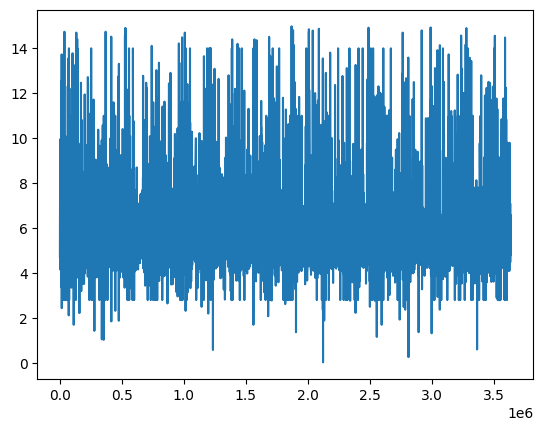

In [126]:
create_data("Глюкоза", 15)

# Билирубин

Дисперсия: 6.45834982638889
Среднеквадратичное отклонение: 2.5413283586323296
Математическое ожидание: 1.818375


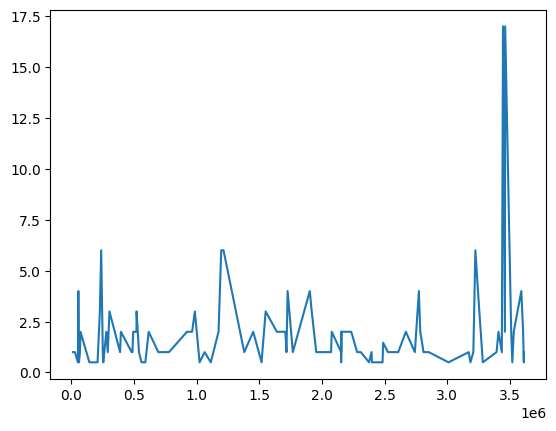

In [127]:
create_data("Билирубин")

# Уробилиноген

Дисперсия: 121.6175421665294
Среднеквадратичное отклонение: 11.028034374562377
Математическое ожидание: 3.524581660336408


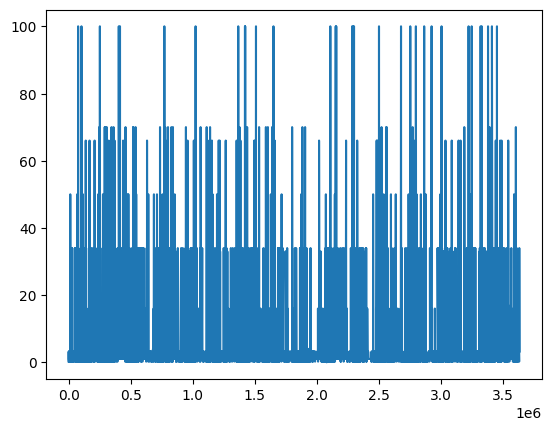

In [128]:
create_data("Уробилиноген")

# Кетоны

Дисперсия: 271.0401604519255
Среднеквадратичное отклонение: 16.463297374825174
Математическое ожидание: 8.342851796407185


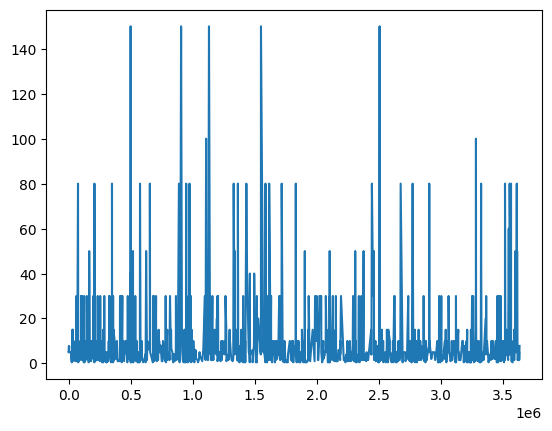

In [129]:
create_data("Кетоны")

# Нитриты

Дисперсия: 0.0
Среднеквадратичное отклонение: 0.0
Математическое ожидание: 0.0


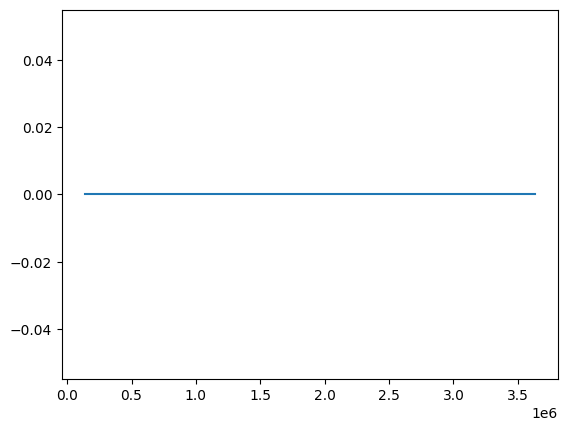

In [130]:
create_data("Нитриты")

# Анализ крови

# {HGB} Гемоглобин

Дисперсия: 309.00629458219515
Среднеквадратичное отклонение: 17.578574873470124
Математическое ожидание: 123.90919970082275


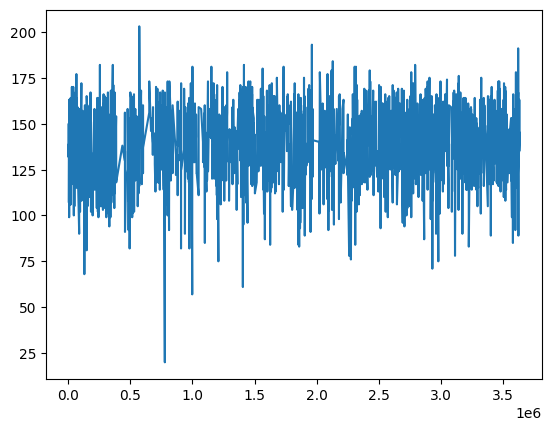

In [131]:
create_data("{HGB} Гемоглобин")

# {RBC} Эритроциты

Дисперсия: 0.3181836888114529
Среднеквадратичное отклонение: 0.5640777329512777
Математическое ожидание: 4.269833582647719


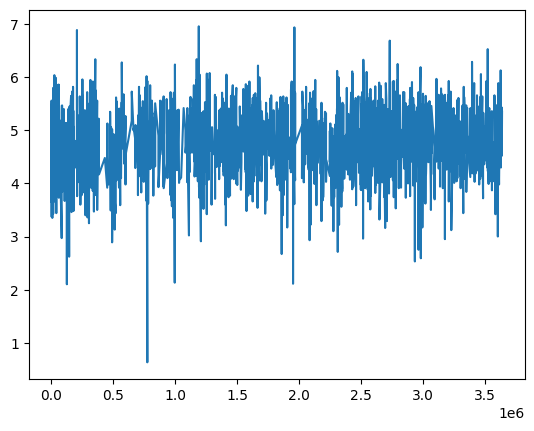

In [132]:
create_data("{RBC} Эритроциты")

# {HCT} Гематокрит

Дисперсия: 21.97847595813085
Среднеквадратичное отклонение: 4.688120727768308
Математическое ожидание: 36.33973821989529


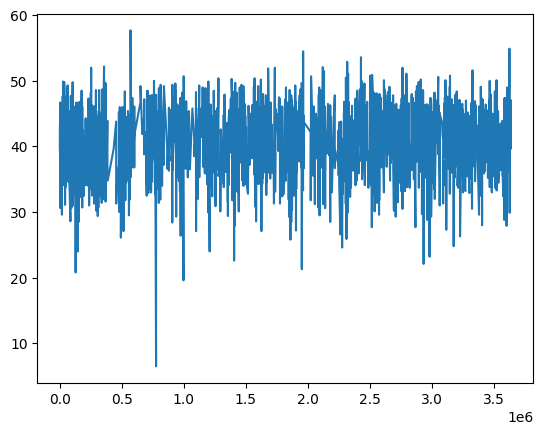

In [133]:
create_data("{HCT} Гематокрит")

# {MCV} Ср. объем эритроцита

Дисперсия: 38.43606520923108
Среднеквадратичное отклонение: 6.199682670042966
Математическое ожидание: 76.84384442782347


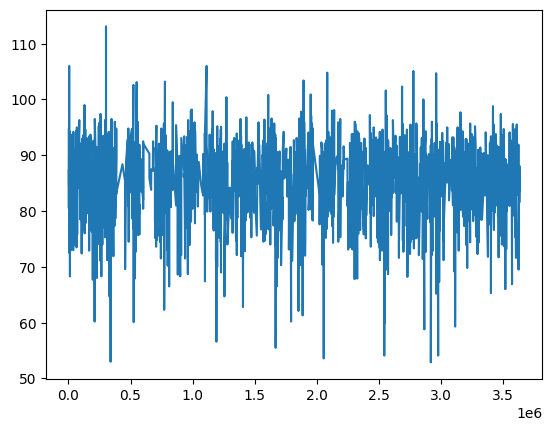

In [134]:
create_data("{MCV} Ср. объем эритроцита")

# {MCH} Ср.сод. гемоглоб. в эр-те

Дисперсия: 4.997309783566396
Среднеквадратичное отклонение: 2.2354663458809654
Математическое ожидание: 26.171387434554976


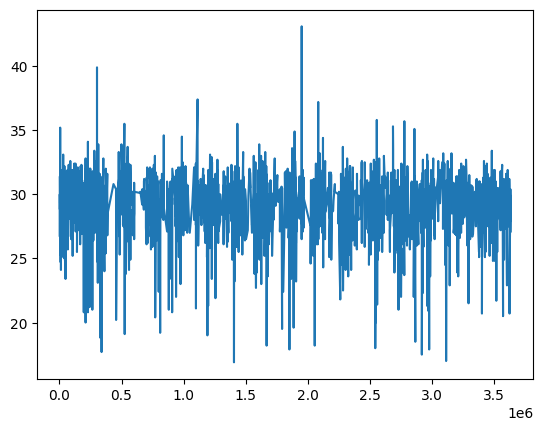

In [135]:
create_data("{MCH} Ср.сод. гемоглоб. в эр-те")

# {MCHC} Ср.конц.гемоглоб. в эр-те

Дисперсия: 149.17545224827686
Среднеквадратичное отклонение: 12.213740305421467
Математическое ожидание: 306.5863126402394


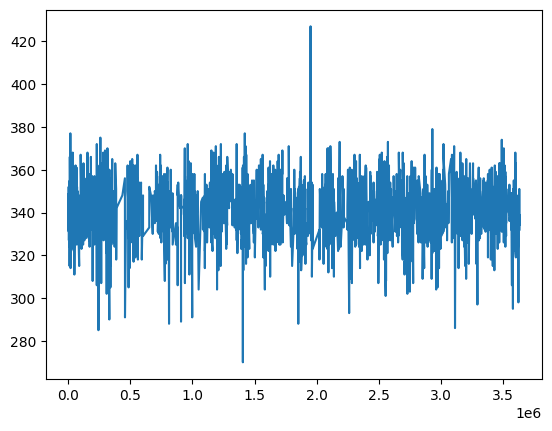

In [136]:
create_data("{MCHC} Ср.конц.гемоглоб. в эр-те")

# {RDW} Ширина распр. эр-та по объему

Дисперсия: 2.140888733184643
Среднеквадратичное отклонение: 1.4631776150504228
Математическое ожидание: 12.198573033707865


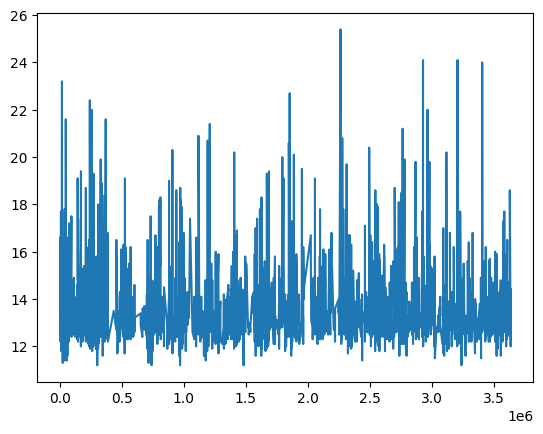

In [137]:
create_data("{RDW} Ширина распр. эр-та по объему")

# {PLT} Тромбоциты

Дисперсия: 6181.667455897742
Среднеквадратичное отклонение: 78.6235807878129
Математическое ожидание: 248.2734006734007


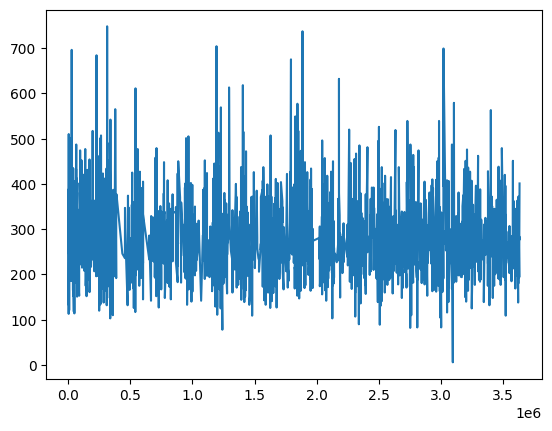

In [138]:
create_data("{PLT} Тромбоциты")

# {MPV} Средний объем тромбоцитов

Дисперсия: 0.9063103316644825
Среднеквадратичное отклонение: 0.9520033254482269
Математическое ожидание: 9.591544532130778


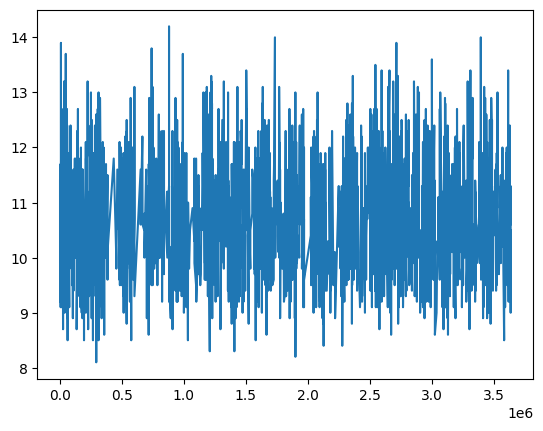

In [139]:
create_data("{MPV} Средний объем тромбоцитов")

# {PDW} Ширина распределения тромбоцитов

Дисперсия: 4.255724768006874
Среднеквадратичное отклонение: 2.0629408057447685
Математическое ожидание: 11.166899661781287


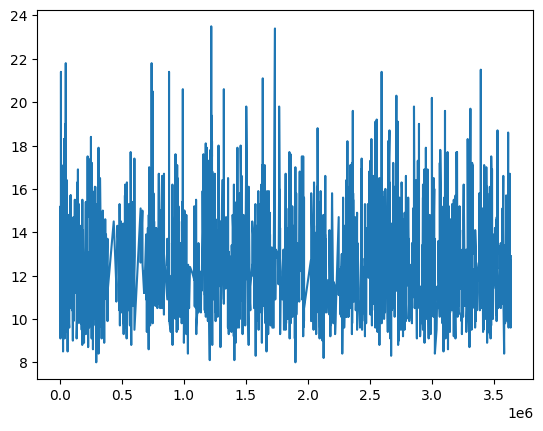

In [140]:
create_data("{PDW} Ширина распределения тромбоцитов")

# {PCT} Тромбоцитокрит

Дисперсия: 0.005679433847659083
Среднеквадратичное отклонение: 0.07536201860127609
Математическое ожидание: 0.26228523111612173


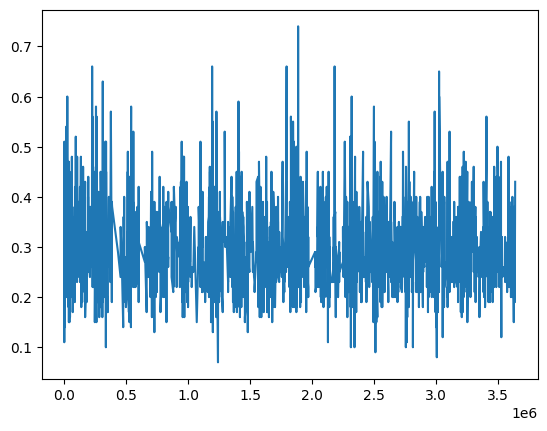

In [141]:
create_data("{PCT} Тромбоцитокрит")

# {P-LCR} Коэффициент крупных тромбоцитов

Дисперсия: 59.68494243333599
Среднеквадратичное отклонение: 7.725603046580635
Математическое ожидание: 26.95545659526494


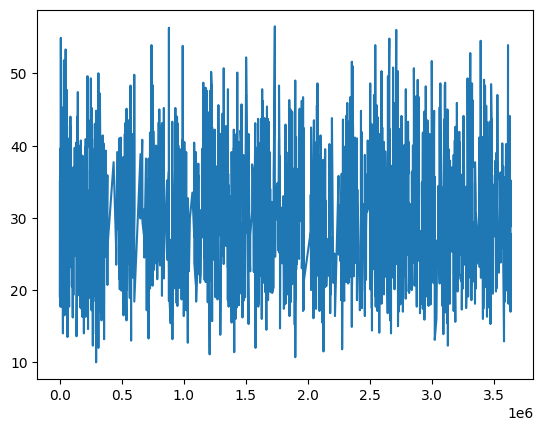

In [142]:
create_data("{P-LCR} Коэффициент крупных тромбоцитов")

# {WBC} Лейкоциты

Дисперсия: 8.032109999669943
Среднеквадратичное отклонение: 2.8340977399641574
Математическое ожидание: 6.602176514584891


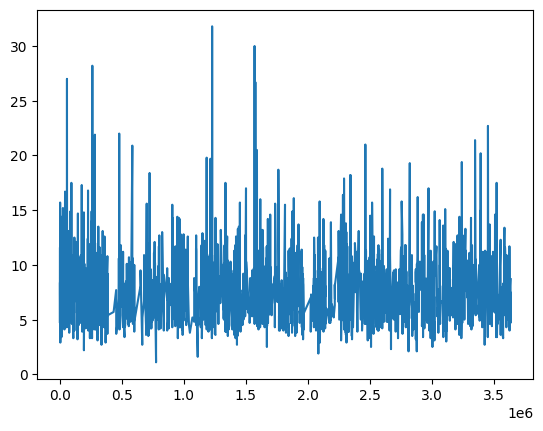

In [143]:
create_data("{WBC} Лейкоциты")

# {NEU#} Кол-во нейтрофилов

Дисперсия: 6.134388924469488
Среднеквадратичное отклонение: 2.476769856984998
Математическое ожидание: 3.775358638743456


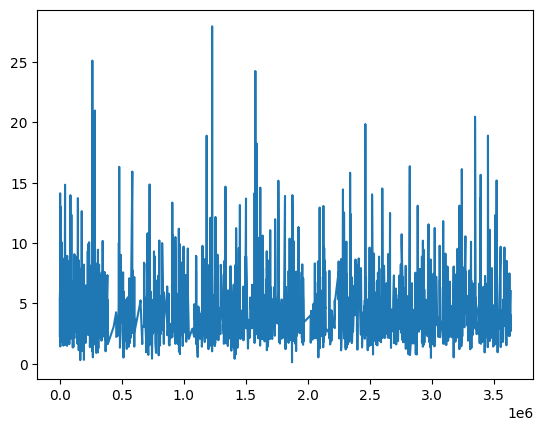

In [144]:
create_data("{NEU#} Кол-во нейтрофилов")

# {LYM#} Кол-во лимфоцитов

Дисперсия: 1.4775821346196987
Среднеквадратичное отклонение: 1.2155583633128022
Математическое ожидание: 2.064843679880329


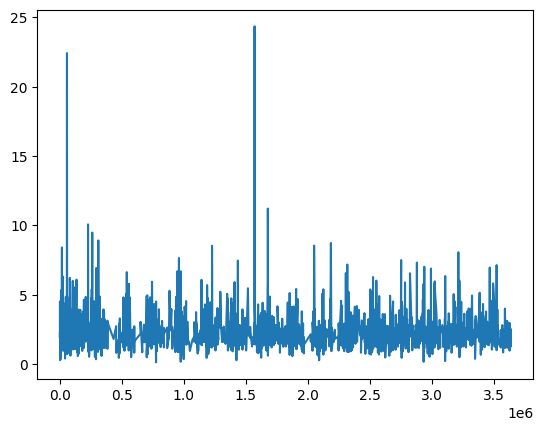

In [145]:
create_data("{LYM#} Кол-во лимфоцитов")

# {MONO#} Кол-во моноцитов

Дисперсия: 0.0772368938625586
Среднеквадратичное отклонение: 0.27791526381715453
Математическое ожидание: 0.5758821989528796


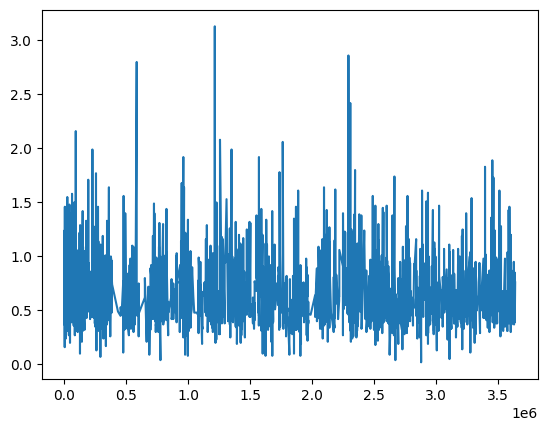

In [146]:
create_data("{MONO#} Кол-во моноцитов")

# {EOS#} Кол-во эозинофилов

Дисперсия: 0.04104056532922645
Среднеквадратичное отклонение: 0.20258471148935808
Математическое ожидание: 0.15827412116679132


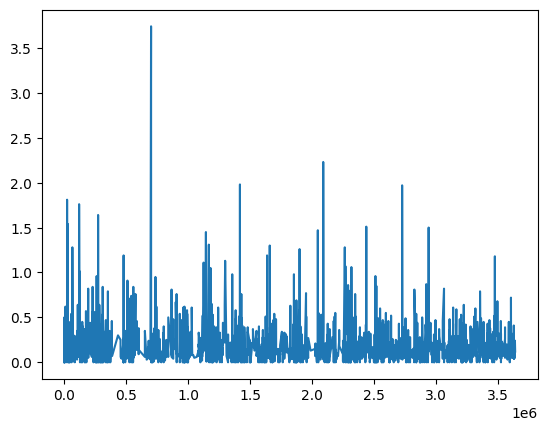

In [147]:
create_data("{EOS#} Кол-во эозинофилов")

# {BASO#} Кол-во базофилов

Дисперсия: 0.000548691672880879
Среднеквадратичное отклонение: 0.023424168563278377
Математическое ожидание: 0.01362116679132386


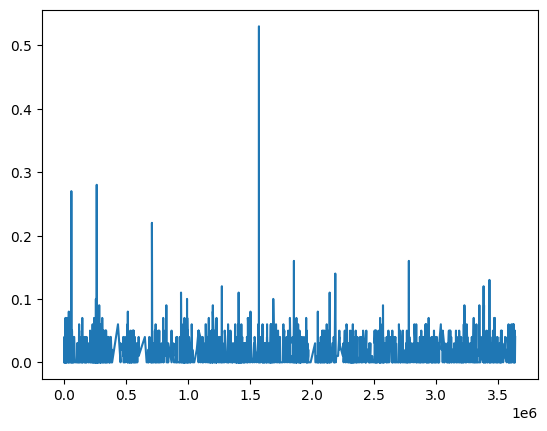

In [148]:
create_data("{BASO#} Кол-во базофилов")

# Нейтрофилы сегментоядерные

Дисперсия: 178.4333506846449
Среднеквадратичное отклонение: 13.357894695072456
Математическое ожидание: 49.43436798803291


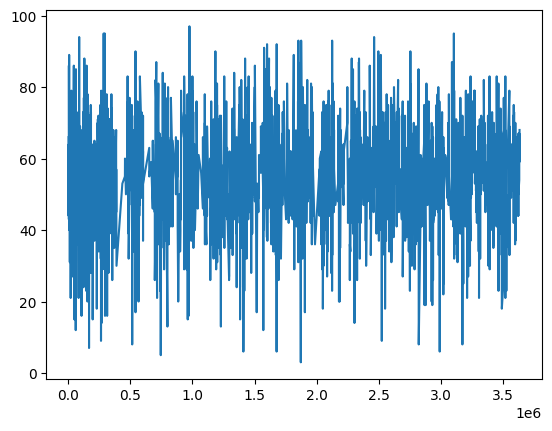

In [149]:
create_data("Нейтрофилы сегментоядерные")